In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv("/content/hospital_data.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,3/8/2013 20:38,12500,22/03/2017 20:25:18,11000,Hosp_48,G,Dist_12,6/8/2013 0:00,7/9/2013 0:00,NO,NaN,D
1,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,6/8/2013 7:26,12500,22/03/2017 20:25:18,11000,Hosp_48,G,Dist_12,8/8/2013 0:00,9/9/2013 0:00,NO,NaN,D
2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,9/8/2013 18:30,12500,22/03/2017 20:25:18,11500,Hosp_48,G,Dist_12,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,24/08/2013 19:37:41,12500,22/03/2017 20:25:18,11000,Hosp_48,G,Dist_12,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,28/08/2013 17:03:07,12500,22/03/2017 20:25:19,11000,Hosp_48,G,Dist_12,31/08/2013 00:00:00,2/10/2013 0:00,NO,NaN,D


In [0]:
df.dtypes

AGE                  int64
SEX                 object
CASTE_NAME          object
CATEGORY_CODE       object
CATEGORY_NAME       object
SURGERY_CODE        object
SURGERY             object
DISTRICT_NAME       object
PREAUTH_DATE        object
PREAUTH_AMT          int64
CLAIM_DATE          object
CLAIM_AMOUNT         int64
HOSP_NAME           object
HOSP_TYPE           object
HOSP_DISTRICT       object
SURGERY_DATE        object
DISCHARGE_DATE      object
Mortality Y / N     object
MORTALITY_DATE      object
SRC_REGISTRATION    object
dtype: object

Demographic: age, sex, caste_name, district_name, hosp_name, hosp_type, hosp_district

Operation: category_code, category_name, surgery_code, surgery

Prediction: Mortality Y/N

In [0]:
df.isnull().sum()

AGE                      0
SEX                      0
CASTE_NAME               0
CATEGORY_CODE            0
CATEGORY_NAME            0
SURGERY_CODE             0
SURGERY                  0
DISTRICT_NAME            0
PREAUTH_DATE             0
PREAUTH_AMT              0
CLAIM_DATE               0
CLAIM_AMOUNT             0
HOSP_NAME                0
HOSP_TYPE                0
HOSP_DISTRICT            0
SURGERY_DATE             0
DISCHARGE_DATE        4560
Mortality Y / N          0
MORTALITY_DATE      469566
SRC_REGISTRATION         0
dtype: int64

In [0]:
df.drop(['PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT', 'SURGERY_DATE', 'DISCHARGE_DATE', 'MORTALITY_DATE'],axis=1,inplace=True)
df.head()
df.rename(columns = {'Mortality Y / N':'Mortality'}, inplace = True)

In [0]:
df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality,SRC_REGISTRATION
0,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,NO,D
1,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,NO,D
2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,NO,D
3,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,NO,D
4,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,NO,D


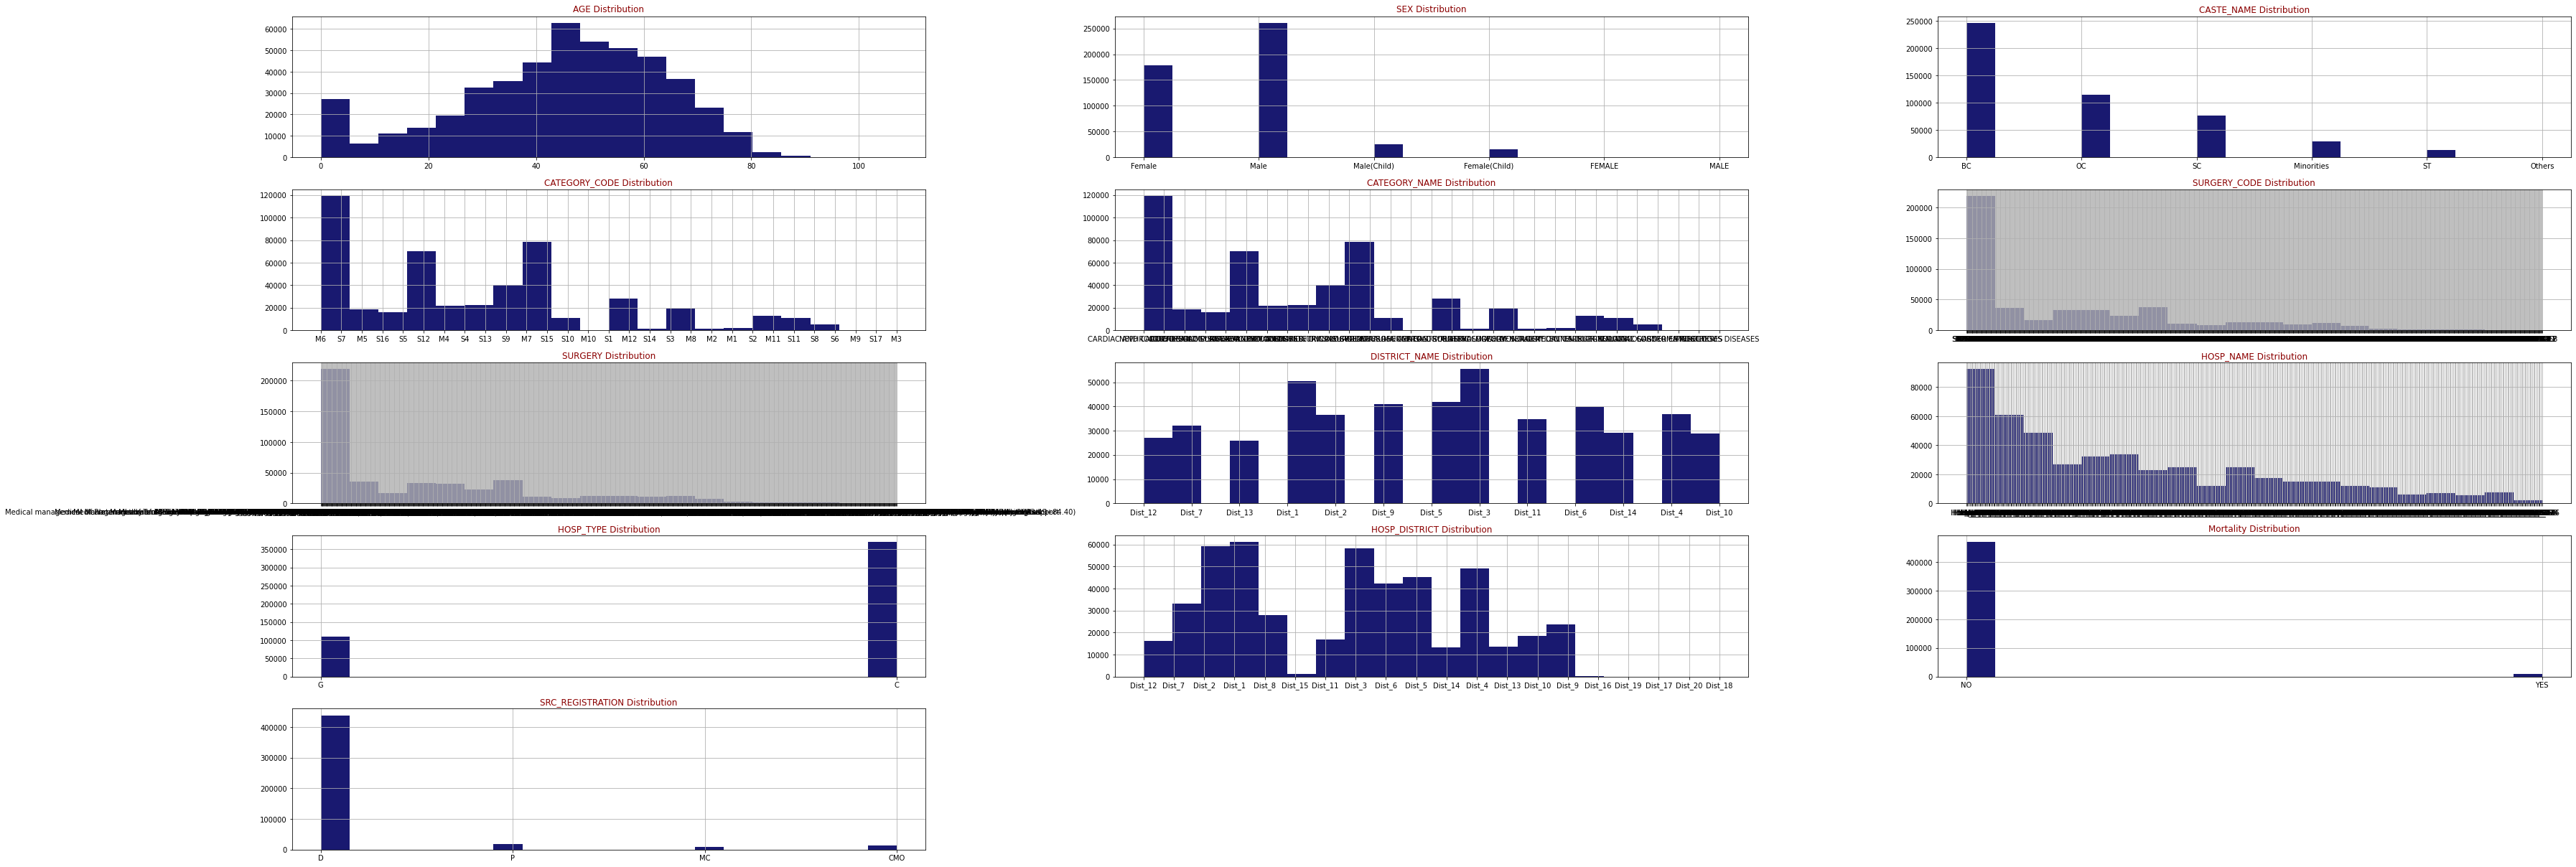

In [0]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(50,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [0]:
df.Mortality.value_counts()

NO     469566
YES     10122
Name: Mortality, dtype: int64

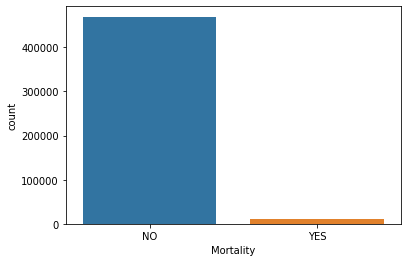

In [0]:
sn.countplot(x='Mortality',data=df)

In [0]:
df.dtypes

AGE                  int64
SEX                 object
CASTE_NAME          object
CATEGORY_CODE       object
CATEGORY_NAME       object
SURGERY_CODE        object
SURGERY             object
DISTRICT_NAME       object
HOSP_NAME           object
HOSP_TYPE           object
HOSP_DISTRICT       object
Mortality           object
SRC_REGISTRATION    object
dtype: object

In [0]:
df.loc[df['Mortality'] == 'NO', 'Mortality'] = 0
df.loc[df['Mortality'] == 'YES', 'Mortality'] = 1
df['Mortality'] = df['Mortality'].astype('int64')
df['Mortality'].value_counts()

0    469566
1     10122
Name: Mortality, dtype: int64

In [0]:
# no. of unique vals in object type cols
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

SEX                   6
CASTE_NAME            6
CATEGORY_CODE        29
CATEGORY_NAME        29
SURGERY_CODE        925
SURGERY             923
DISTRICT_NAME        13
HOSP_NAME           467
HOSP_TYPE             2
HOSP_DISTRICT        20
SRC_REGISTRATION      4
dtype: int64

In [0]:
df.loc[df['AGE'] <= 10, 'AGE'] = 10
df.loc[(df['AGE'] > 10) & (df['AGE'] <= 20), 'AGE'] = 20
df.loc[(df['AGE'] > 20) & (df['AGE'] <= 30), 'AGE'] = 30
df.loc[(df['AGE'] > 30) & (df['AGE'] <= 40), 'AGE'] = 40
df.loc[(df['AGE'] > 40) & (df['AGE'] <= 50), 'AGE'] = 50
df.loc[(df['AGE'] > 50) & (df['AGE'] <= 60), 'AGE'] = 60
df.loc[(df['AGE'] > 60) & (df['AGE'] <= 70), 'AGE'] = 70
df.loc[(df['AGE'] > 70) & (df['AGE'] <= 80), 'AGE'] = 80
df.loc[(df['AGE'] > 80) & (df['AGE'] <= 90), 'AGE'] = 90
df.loc[df['AGE'] > 90, 'AGE'] = 100

Text(0.5, 1.0, 'AGE count')

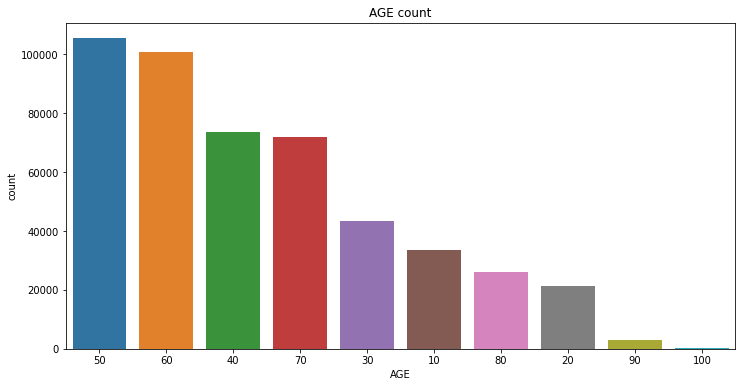

In [0]:
plt.figure(figsize=(12, 6))
sn.countplot(x="AGE", data=df, order=df['AGE'].value_counts().index)
plt.title("AGE count")

In [0]:
temp_df = df.groupby(['Mortality', 'AGE'])['AGE'].count().unstack(['AGE'])
temp_df.head()

AGE,10,20,30,40,50,60,70,80,90,100
Mortality,,,,,,,,,,
0,32505,21118,42731,72628,103677,98499,70038,25360,2890,120
1,979,267,599,1061,1828,2366,2068,832,113,9


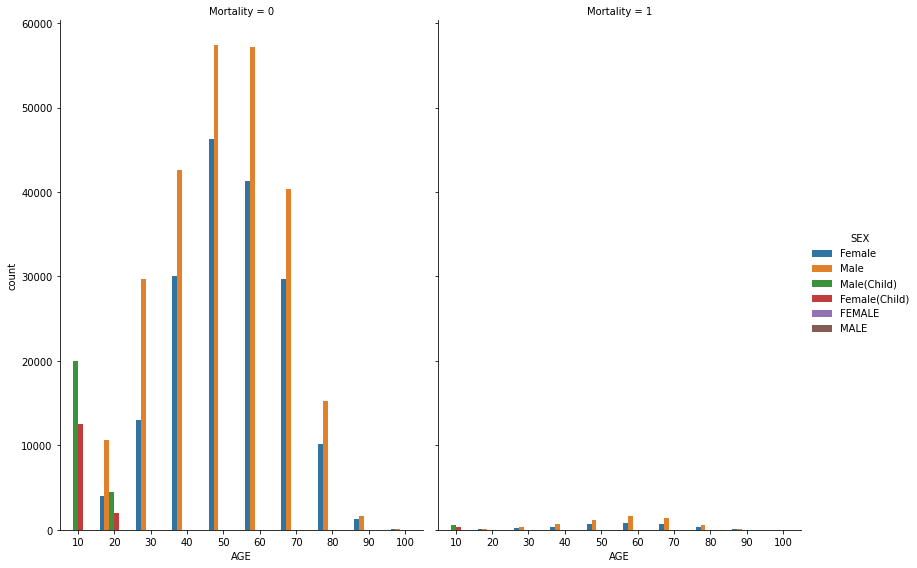

In [0]:
sn.catplot(x='AGE', col='Mortality', hue='SEX', data=df, kind='count', height=8, aspect=.7)

In [0]:
df.loc[(df['SEX'] == 'MALE') , 'SEX'] = 'Male'
df.loc[(df['SEX'] == 'FEMALE'), 'SEX'] = 'Female'
df.loc[(df['SEX'] == 'Male(Child)'), 'SEX'] = 'Boy'
df.loc[(df['SEX'] == 'Female(Child)'), 'SEX'] = 'Girl'

Text(0.5, 1.0, 'SEX count')

<Figure size 864x432 with 0 Axes>

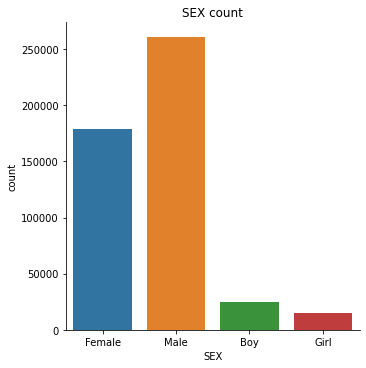

In [0]:
plt.figure(figsize=(12, 6))
sn.catplot(x="SEX", kind="count", data=df)
plt.title("SEX count")

In [0]:
df['SEX'].value_counts()

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

Text(0.5, 1.0, 'SEX vs Mortality plot')

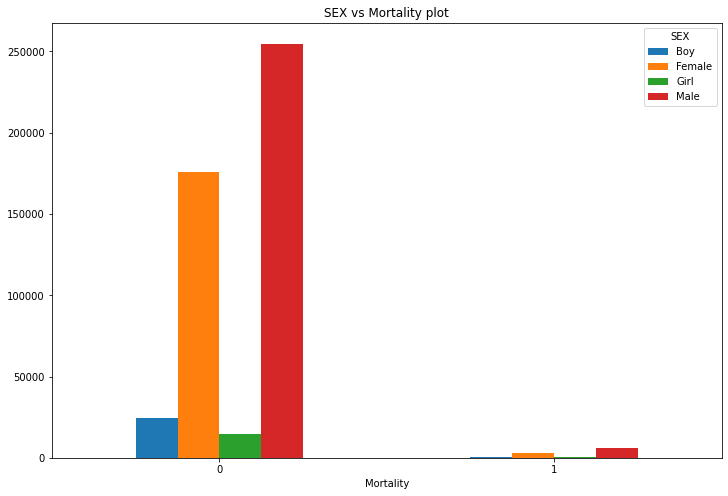

In [0]:
temp_df = df.groupby(['Mortality', 'SEX'])['SEX'].count().unstack('SEX')
temp_df.plot.bar(rot=0, figsize=(12,8))
plt.title('SEX vs Mortality plot')

In [0]:
temp_df = df.groupby(['Mortality', 'AGE', 'SEX'])['SEX'].count().unstack(['Mortality']).reset_index()
temp_df.columns = ['AGE', 'SEX', '0', '1']
temp_df.sort_values(by='0', ascending=False).head()

,AGE,SEX,0,1
12,50,Male,57451.0,1196.0
14,60,Male,57221.0,1584.0
11,50,Female,46226.0,632.0
10,40,Male,42556.0,720.0
13,60,Female,41278.0,782.0


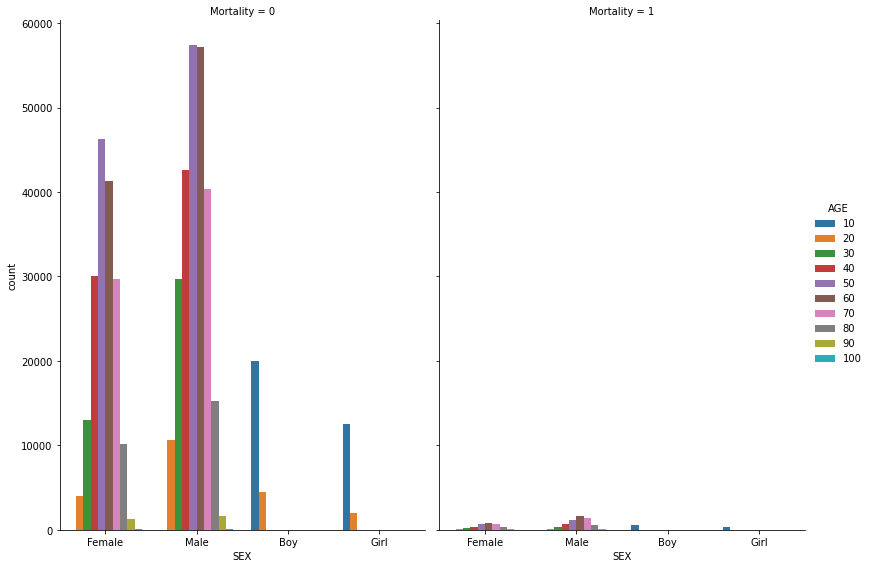

In [0]:
sn.catplot(x='SEX', col='Mortality', hue='AGE', data=df, kind='count', height=8, aspect=.7)

In [0]:
df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality,SRC_REGISTRATION
0,60,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,0,D
1,40,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,0,D
2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,0,D
3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,0,D
4,60,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,Hosp_48,G,Dist_12,0,D


In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [0]:
df['SEX '] = le.fit_transform(df['SEX'])
df['CASTE_NAME'] = le.fit_transform(df['CASTE_NAME'])
df['CATEGORY_CODE'] = le.fit_transform(df['CATEGORY_CODE'])
df['CATEGORY_NAME '] = le.fit_transform(df['CATEGORY_NAME'])
df['SEX '] = le.fit_transform(df['SEX'])df['SEX '] = le.fit_transform(df['SEX'])df['SEX '] = le.fit_transform(df['SEX'])

In [0]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    if len(list(df[col].value_counts())) > 6:
        df[col] = le.fit_transform(df[col])

In [0]:
df = pd.get_dummies(df)

In [0]:
X = df.drop('Mortality', axis=1)
y = df['Mortality']

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

log_reg = LogisticRegression()

# c_values = np.logspace(-2, 2, 10)
# clf = GridSearchCV(estimator=log_reg, param_grid={'C': c_values},scoring='roc_auc', n_jobs=1, cv=time_split, verbose=1)
# clf.fit(X_train, y_train)
# clf.best_params_
# y_pred = clf.predict(X_test)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9796952198294732


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[140985,      0],
       [  2922,      0]])